In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# DATA EXPLORATION

# LOAD THE DATA

df= pd.read_csv('Bordercrossing.csv')

In [3]:
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524)
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207)
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333)
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996)
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005)


In [4]:
# LOOKS FOR NULL VALUES 

df.isnull().sum()

Port Name    0
State        0
Port Code    0
Border       0
Date         0
Measure      0
Value        0
Location     0
dtype: int64

In [5]:
df.nunique()

Port Name      116
State           15
Port Code      117
Border           2
Date           279
Measure         12
Value        53305
Location       224
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346733 entries, 0 to 346732
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Port Name  346733 non-null  object
 1   State      346733 non-null  object
 2   Port Code  346733 non-null  int64 
 3   Border     346733 non-null  object
 4   Date       346733 non-null  object
 5   Measure    346733 non-null  object
 6   Value      346733 non-null  int64 
 7   Location   346733 non-null  object
dtypes: int64(2), object(6)
memory usage: 21.2+ MB


In [7]:
print('Attribute' + 'Values')
for i in df.columns:
    print(i, len(df.loc[:,i].unique()))

AttributeValues
Port Name 116
State 15
Port Code 117
Border 2
Date 279
Measure 12
Value 53305
Location 224


In [8]:
# A strange thing note i.e. the number of Port names are 116 but number of port code are 117
# So there is a possibility of two ports with the same port names.

checker = df[['Port Name','Port Code']].drop_duplicates()
checker[checker['Port Name'].duplicated(keep=False)]

,Port Name,Port Code
29,Eastport,3302
217,Eastport,103


In [9]:
df.iloc[[29,217]]

,Port Name,State,Port Code,Border,Date,Measure,Value,Location
29,Eastport,Idaho,3302,US-Canada Border,03/01/2019 12:00:00 AM,Trains,101,POINT (-116.18027999999998 48.99944)
217,Eastport,Maine,103,US-Canada Border,03/01/2019 12:00:00 AM,Trucks,165,POINT (-66.99387 44.90357)


In [10]:
# SO HERE EASTPORT HAS TWO DIFFERENT PORT CODES AS IT IS IN TWO DIFFERENT STATES

In [11]:
# CONVERT DATES FROM STRINGS TO DATE FORMAT

df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].apply(lambda x : x.year)

month_mapper = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun'
               ,7:'Jul', 8:'Aug', 9:'Sep' ,10:'Oct', 11:'Nov', 12:'Dec'}
df['Month'] = df['Date'].apply(lambda x : x.month).map(month_mapper)

del month_mapper

In [12]:
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,Year,Month
0,Calexico East,California,2507,US-Mexico Border,2019-03-01,Trucks,34447,POINT (-115.48433000000001 32.67524),2019,Mar
1,Van Buren,Maine,108,US-Canada Border,2019-03-01,Rail Containers Full,428,POINT (-67.94271 47.16207),2019,Mar
2,Otay Mesa,California,2506,US-Mexico Border,2019-03-01,Trucks,81217,POINT (-117.05333 32.57333),2019,Mar
3,Nogales,Arizona,2604,US-Mexico Border,2019-03-01,Trains,62,POINT (-110.93361 31.340279999999996),2019,Mar
4,Trout River,New York,715,US-Canada Border,2019-03-01,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),2019,Mar


In [13]:
# TWO TERRESTIAL BORDERS i.e. CANANDA AND MEXICO 

borders = df['Border'].unique()
print(borders)

['US-Mexico Border' 'US-Canada Border']


No handles with labels found to put in legend.


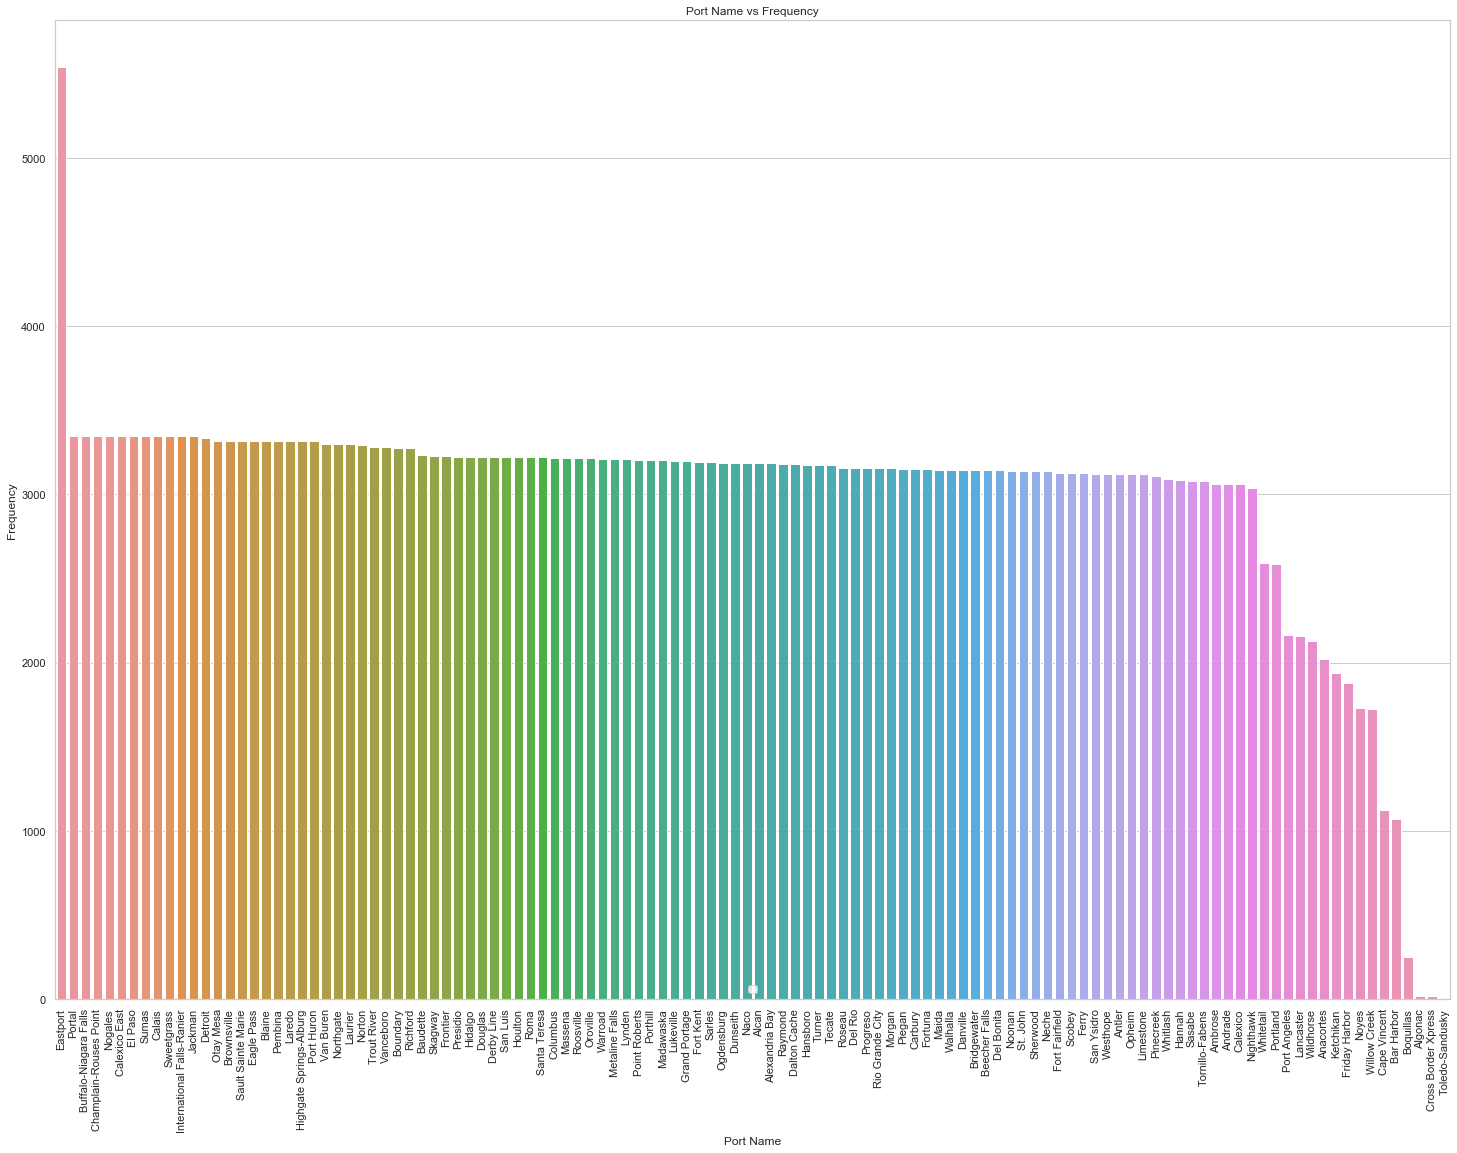

In [20]:
# Bar chart for Port name vs Frequency

plt.figure(figsize=(25,18))
sns.set(style='whitegrid')
ax=sns.barplot(x=df['Port Name'].value_counts().index,y=df['Port Name'].value_counts().values)
plt.legend(loc=8)
plt.xlabel('Port Name')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.title('Port Name vs Frequency')
plt.show()

In [19]:
# Now plotting it Statewise 

df.State.value_counts()

North Dakota    57071
Washington      44677
Montana         38154
Maine           38136
Texas           35754
Minnesota       23135
New York        20697
Arizona         19252
California      19102
Vermont         16247
Alaska          11529
Michigan         9985
Idaho            6551
New Mexico       6438
Ohio                5
Name: State, dtype: int64

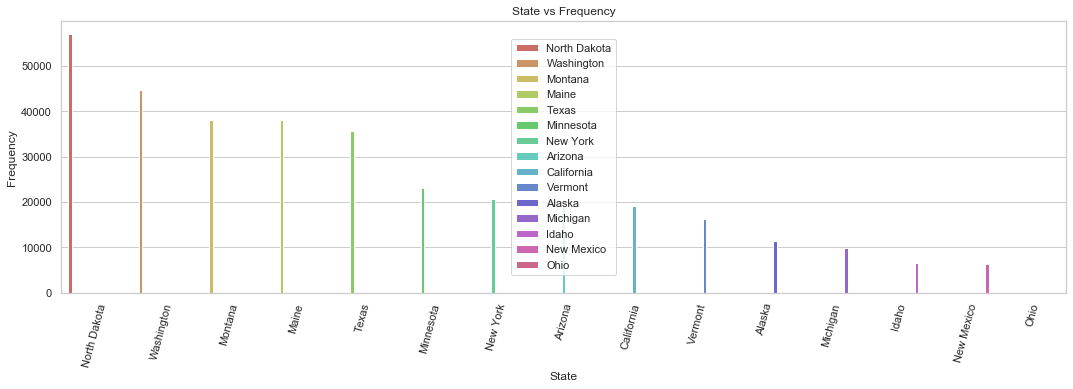

In [34]:
# Plot for Number of State entries vs Frequency

plt.figure(figsize=(18,5))
sns.set(style='whitegrid')
ax=sns.barplot(x=df['State'].value_counts().index,y=df['State'].value_counts().values,palette="hls",hue=['North Dakota',
                                                                                                             'Washington',
                                                                                                              "Montana",
                                                                                                            "Maine",
                                                                                                            "Texas",
                                                                                                            "Minnesota",
                                                                                                            "New York",
                                                                                                            "Arizona",
                                                                                                            "California",
                                                                                                            "Vermont",
                                                                                                            "Alaska",
                                                                                                            "Michigan",
                                                                                                            "Idaho",
                                                                                                            "New Mexico",
                                                                                                            "Ohio"])

plt.xlabel('State')
plt.xticks(rotation=75)
plt.ylabel('Frequency')
plt.title('State vs Frequency')
plt.legend(loc=10)
plt.show()


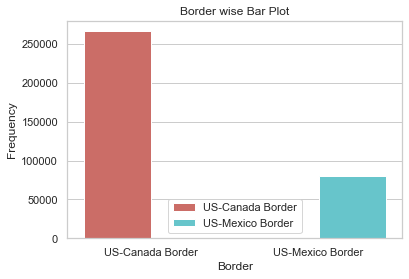

In [36]:
# Plot for US-Cananda and US-Mexico border vs Frequency

sns.set(style='whitegrid')
ax=sns.barplot(x=df['Border'].value_counts().index,y=df['Border'].value_counts().values,palette="hls",hue=['US-Canada Border','US-Mexico Border'])
plt.legend(loc=8)
plt.xlabel('Border')
plt.ylabel('Frequency')
plt.title('Border wise Bar Plot')
plt.show()

In [38]:
df.Measure.value_counts()

Personal Vehicles              30219
Personal Vehicle Passengers    30196
Trucks                         29856
Truck Containers Empty         29757
Truck Containers Full          29694
Buses                          28822
Bus Passengers                 28820
Pedestrians                    28697
Trains                         27708
Rail Containers Empty          27684
Rail Containers Full           27657
Train Passengers               27623
Name: Measure, dtype: int64

No handles with labels found to put in legend.


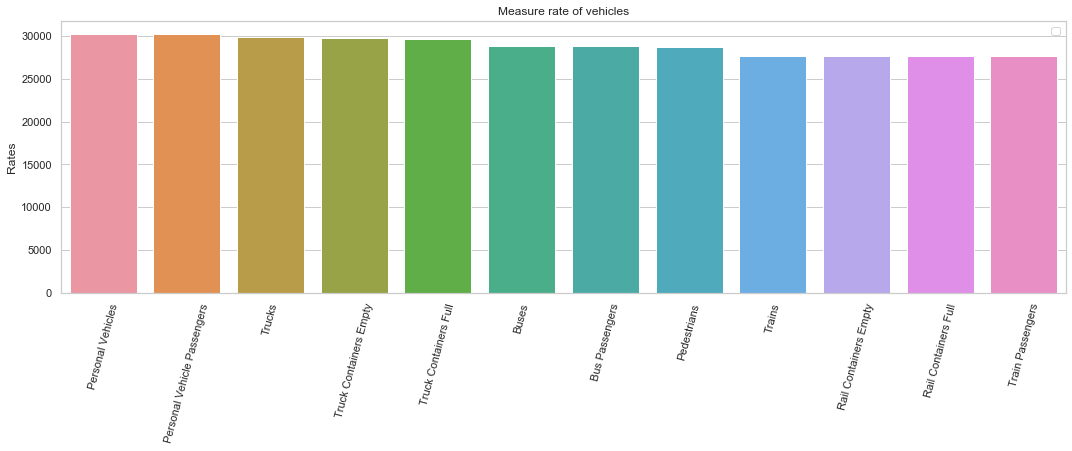

In [39]:
# Plot for measure rates of vehicles vs rates

plt.figure(figsize=(18,5))
sns.barplot(x=df['Measure'].value_counts().index,y=df['Measure'].value_counts().values)
plt.title('Measure rate of vehicles')
plt.ylabel('Rates')
plt.xticks(rotation=75)
plt.legend(loc=0)
plt.show()

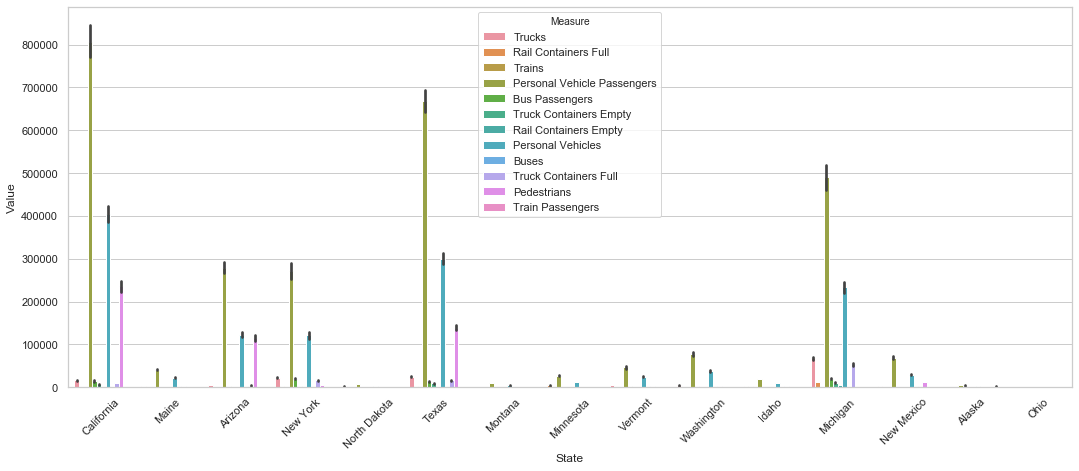

In [43]:
# Bar chart for Measure and State simultaneously

plt.figure(figsize=(18,7))
sns.barplot(x = "State", y = "Value", hue = "Measure", data = df)
plt.xticks(rotation=45)
plt.show()

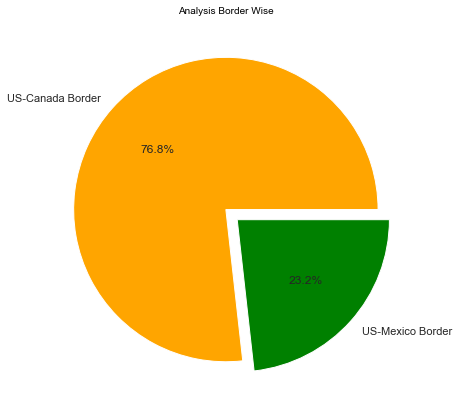

In [49]:
# Pie Diagram for Border Analysis

labels=df['Border'].value_counts().index
colors=['orange','green']
explode=[0,0.1]
values=df['Border'].value_counts().values

#visualization
plt.figure(figsize=(7,7))
plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('Analysis Border Wise',color='black',fontsize=10)
plt.show()

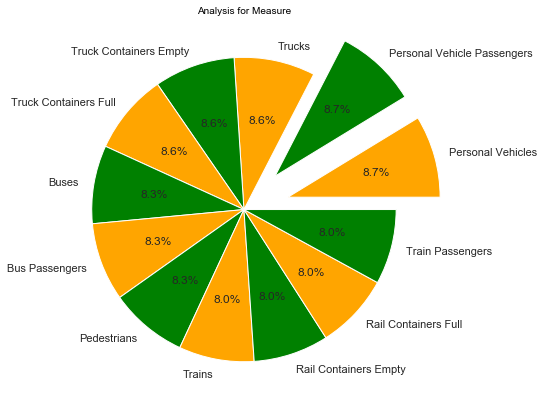

In [52]:
# Pie diagram for analysis of measure

labels=df['Measure'].value_counts().index
colors=['orange','green']
explode=[0.3,0.3,0,0,0,0,0,0,0,0,0,0]
values=df['Measure'].value_counts().values

#visualization
plt.figure(figsize=(7,7))
plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('Analysis for Measure',color='black',fontsize=10)
plt.show()

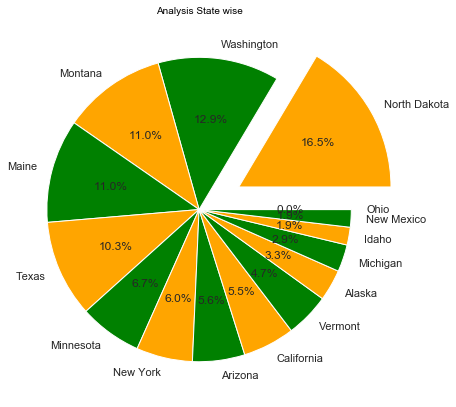

In [54]:
# Pie diagram for Analysis according to state

labels=df['State'].value_counts().index
colors=['orange','green']
explode=[0.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
values=df['State'].value_counts().values

#visualization
plt.figure(figsize=(7,7))
plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('Analysis State wise',color='black',fontsize=10)
plt.show()

In [66]:
# Finding correlation 

d = df[['Date','Measure','Value']].set_index('Date')

year_df = d.pivot_table('Value', index = d.index.year, columns = 'Measure', aggfunc = 'sum')
year_df

Measure,Bus Passengers,Buses,Pedestrians,Personal Vehicle Passengers,Personal Vehicles,Rail Containers Empty,Rail Containers Full,Train Passengers,Trains,Truck Containers Empty,Truck Containers Full,Trucks
Date,,,,,,,,,,,,
1996,5813778,292789,34717351,272593220,101960373,268134,472219,224881,38966,1599429,3124031,8685180
1997,6896919,389969,44461186,307001980,119003203,354288,620145,260610,40541,1920118,3708600,9516639
1998,7608484,436803,45060023,314295857,120451297,513721,1079074,258624,41116,2405012,6223216,10217477
1999,7725590,469496,48801064,330891505,126689655,611927,1376950,265341,38949,2768834,7641245,11176168
2000,8338859,460056,47677158,329841500,129202573,684988,1481674,287756,40555,2747769,7684947,11573707
2001,7823231,457697,52253906,284076951,123834970,764043,1597954,272547,41046,2936782,7942907,11081868
2002,8139017,470321,51362762,268007308,122388232,774094,1653204,270242,40579,2913657,8340836,11342566
2003,7526855,475676,49604705,255834018,118313556,806863,1668857,246897,41911,2626413,8273120,10973782
2004,7278897,424729,48916697,254206275,121794376,835832,1790382,236141,41111,2622197,8666091,11407570


In [67]:
year_df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

Measure,Bus Passengers,Buses,Pedestrians,Personal Vehicle Passengers,Personal Vehicles,Rail Containers Empty,Rail Containers Full,Train Passengers,Trains,Truck Containers Empty,Truck Containers Full,Trucks
Measure,,,,,,,,,,,,
Bus Passengers,1.00,0.98,0.79,0.88,0.87,-0.24,-0.05,0.41,0.78,0.20,0.29,0.52
Buses,0.98,1.00,0.86,0.85,0.89,-0.12,0.07,0.48,0.79,0.32,0.41,0.60
Pedestrians,0.79,0.86,1.00,0.72,0.94,0.30,0.47,0.77,0.88,0.70,0.71,0.89
Personal Vehicle Passengers,0.88,0.85,0.72,1.00,0.89,-0.36,-0.16,0.45,0.73,0.16,0.14,0.50
Personal Vehicles,0.87,0.89,0.94,0.89,1.00,0.07,0.27,0.73,0.92,0.52,0.54,0.82
Rail Containers Empty,-0.24,-0.12,0.30,-0.36,0.07,1.00,0.94,0.60,0.21,0.83,0.78,0.62
Rail Containers Full,-0.05,0.07,0.47,-0.16,0.27,0.94,1.00,0.66,0.36,0.88,0.92,0.74
Train Passengers,0.41,0.48,0.77,0.45,0.73,0.60,0.66,1.00,0.81,0.83,0.70,0.93
Trains,0.78,0.79,0.88,0.73,0.92,0.21,0.36,0.81,1.00,0.53,0.56,0.85


In [75]:
# Ordinary Least Square Model

import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

v1 = ols('Value ~ C(Month)', data=df).fit()
v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.195
Date:                Fri, 23 Oct 2020   Prob (F-statistic):           3.06e-06
Time:                        23:06:55   Log-Likelihood:            -4.6287e+06
No. Observations:              346733   AIC:                         9.258e+06
Df Residuals:                  346721   BIC:                         9.258e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.731e+04    894.171     30.545      0.000    2.56e+04    2.91e+04
C(Month)[T.Aug]  4389.3225   1268.437      3.460      0.001    1903.223    6875.422
C(Month)[T.Dec]  1320.1728   1269.933      1.040      0.299   -1168.858    3809.204
C(Month)[T.Feb] -2485.6825   1256.049     -1.979      0.048   -4947.502     -23.863
C(Month)[T.Jan]  -725.2690   1256.112     -0.577      0.564   -3187.211    1736.673
C(Month)[T.Jul]  3642.0675   1263.662      2.882      0.004    1165.326    6118.809
C(Month)[T.Jun]   973.6386   1263.314      0.771      0.441   -1502.419    3449.696
C(Month)[T.Mar]  1263.9563   1256.028      1.006      0.314   -1197.822    3725.735
C(Month)[T.May]  1379.0374   1263.553      1.091      0.275   -1097.490    3855.565
C(Month)[T.Nov]  -199.7338   1269.504     -0.157      0.875   -2687.925    2288.457
C(Month)[T.Oct]   697.5519   1268.616      0.550      0.582   -1788.899    3184.003
C(Month)[T.Sep]   393.4366   1268.560      0.310      0.756   -2092.905    2879.778
==============================================================================
Omnibus:                   569811.296   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        437695415.234
Skew:                          11.106   Prob(JB):                         0.00
Kurtosis:                     175.635   Cond. No.                         12.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
# Performing ANOVA test

Av1=sm.stats.anova_lm(v1, typ=1)
Av1

,df,sum_sq,mean_sq,F,PR(>F)
C(Month),11.0,1.063968e+12,9.672440e+10,4.194692,0.000003
Residual,346721.0,7.994956e+15,2.305876e+10,NaN,NaN


In [78]:
# Performing Post Tukey HUC Test

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import matplotlib.pyplot as plt

vs = MultiComparison(df['Value'], df['Month'])
result = vs.tukeyhsd()
 
print(result)
print(vs.groupsunique)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj     lower      upper    reject
-------------------------------------------------------------
   Apr    Aug  4389.3225 0.0269    243.9198  8534.7253   True
   Apr    Dec  1320.1728    0.9  -2830.1176  5470.4633  False
   Apr    Feb -2485.6825 0.6814  -6590.5998  1619.2348  False
   Apr    Jan   -725.269    0.9  -4830.3913  3379.8533  False
   Apr    Jul  3642.0675  0.147   -487.7309  7771.8659  False
   Apr    Jun   973.6386    0.9  -3155.0201  5102.2973  False
   Apr    Mar  1263.9563    0.9  -2840.8927  5368.8053  False
   Apr    May  1379.0374    0.9  -2750.4045  5508.4794  False
   Apr    Nov  -199.7338    0.9  -4348.6237  3949.1561  False
   Apr    Oct   697.5519    0.9  -3448.4367  4843.5405  False
   Apr    Sep   393.4366    0.9  -3752.3689   4539.242  False
   Aug    Dec -3069.1497 0.4028  -7232.0961  1093.7968  False
   Aug    Feb  -6875.005  0.001 -10992.7177 -2757.2922   True
   Aug  